In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("solarpowergeneration.csv")
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [5]:
df = df.fillna(df.mean(numeric_only=True))

In [6]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.260303,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


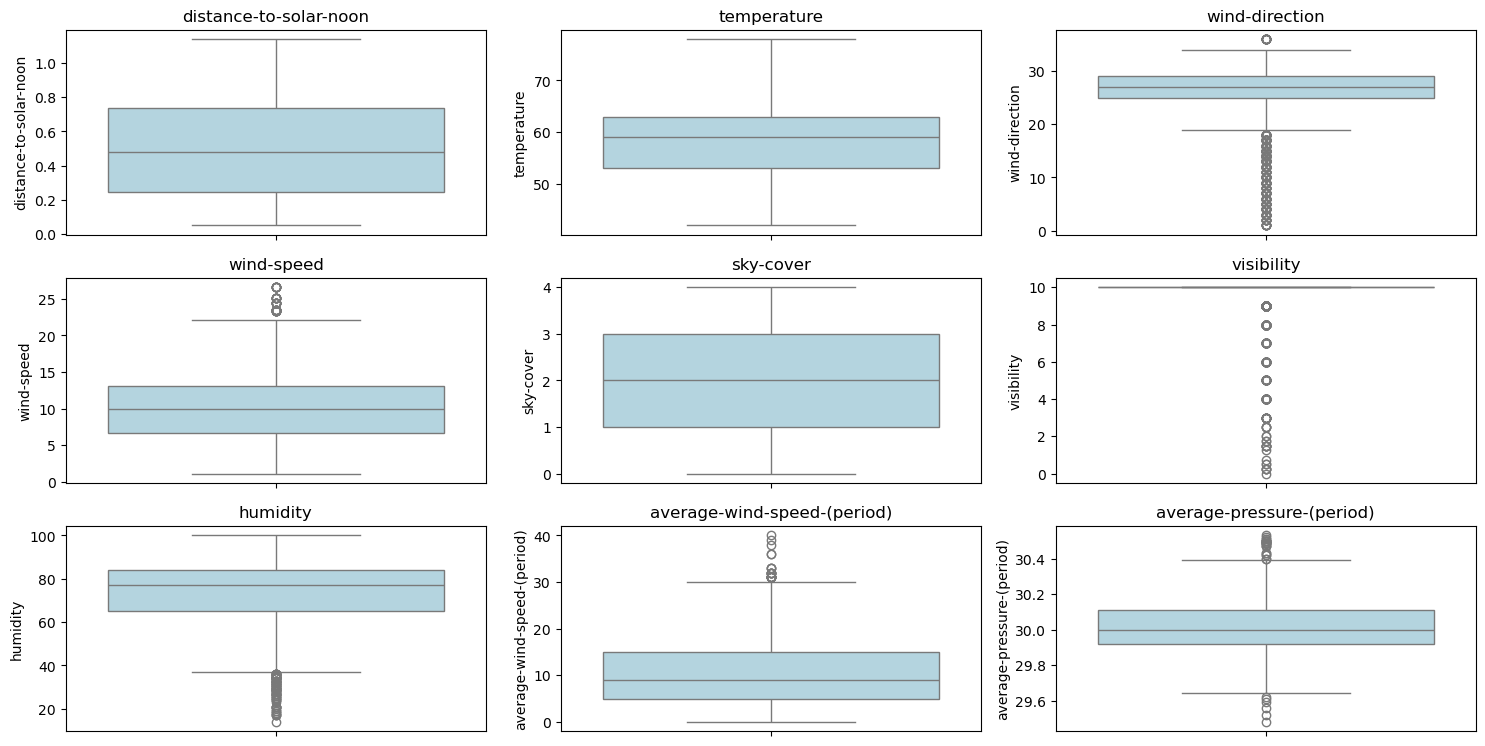

In [7]:
numerical_cols = df.columns[:-1]

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [8]:
df_clean = df.copy()

for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

df_clean.shape

(2001, 10)

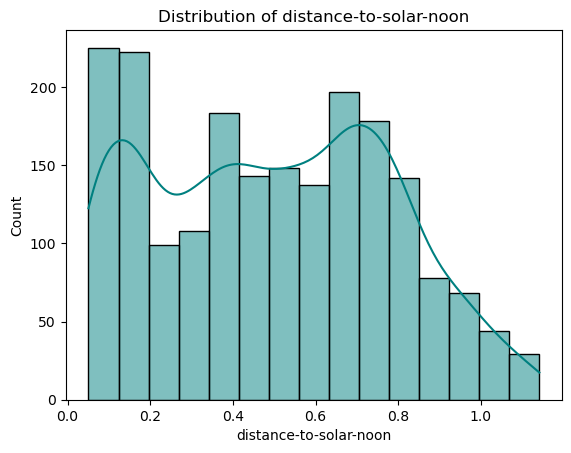

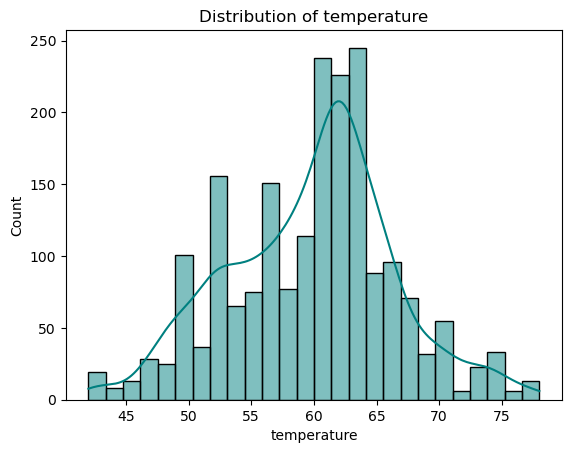

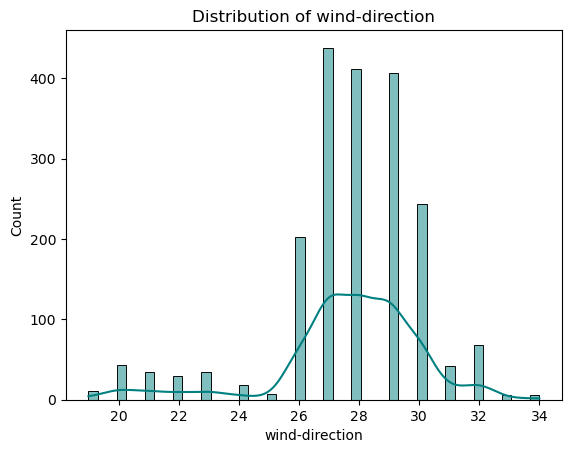

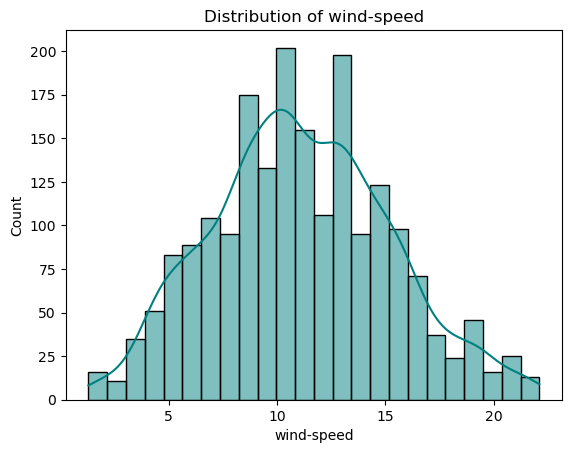

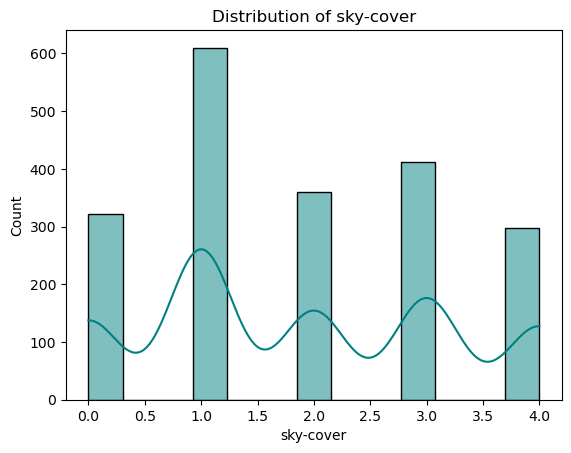

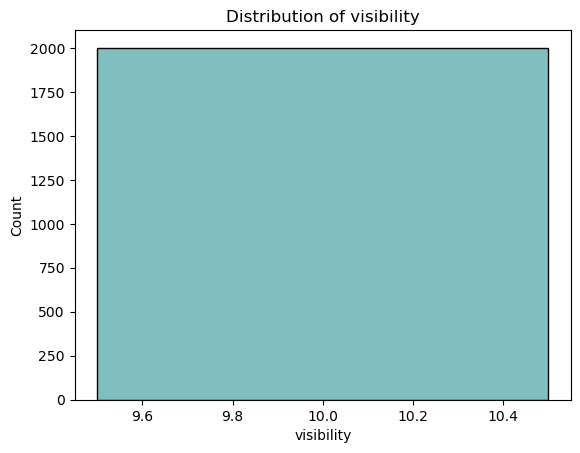

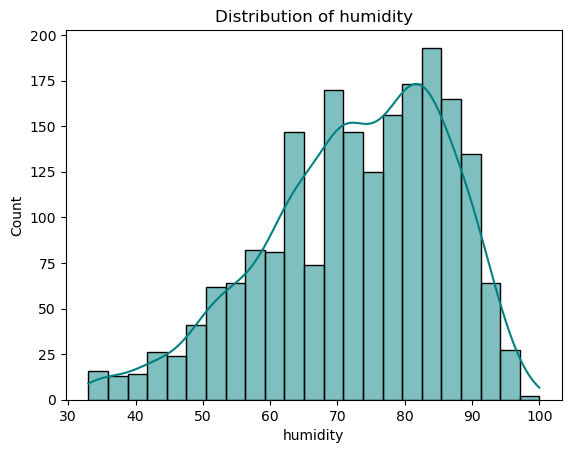

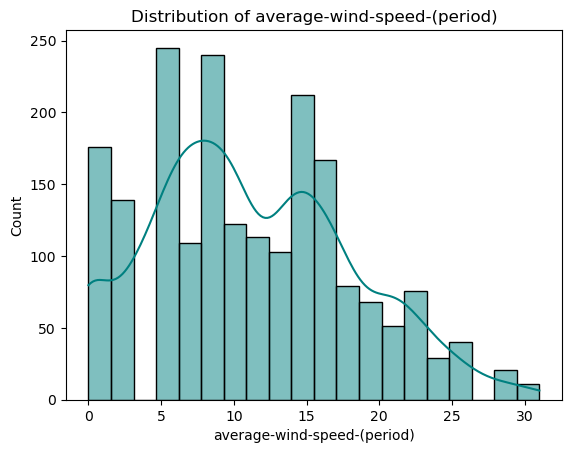

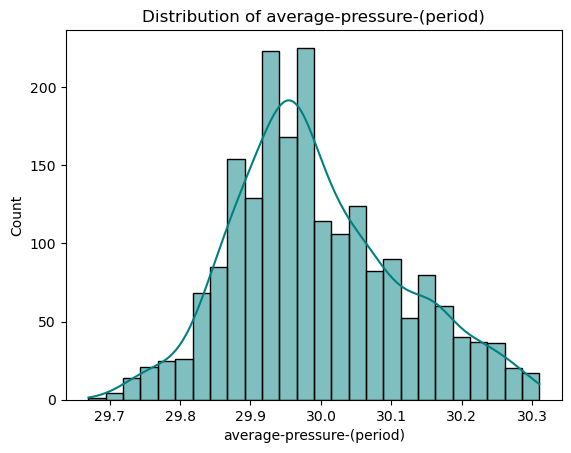

In [9]:
for col in numerical_cols:
    plt.figure()
    sns.histplot(df_clean[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')
    plt.show()

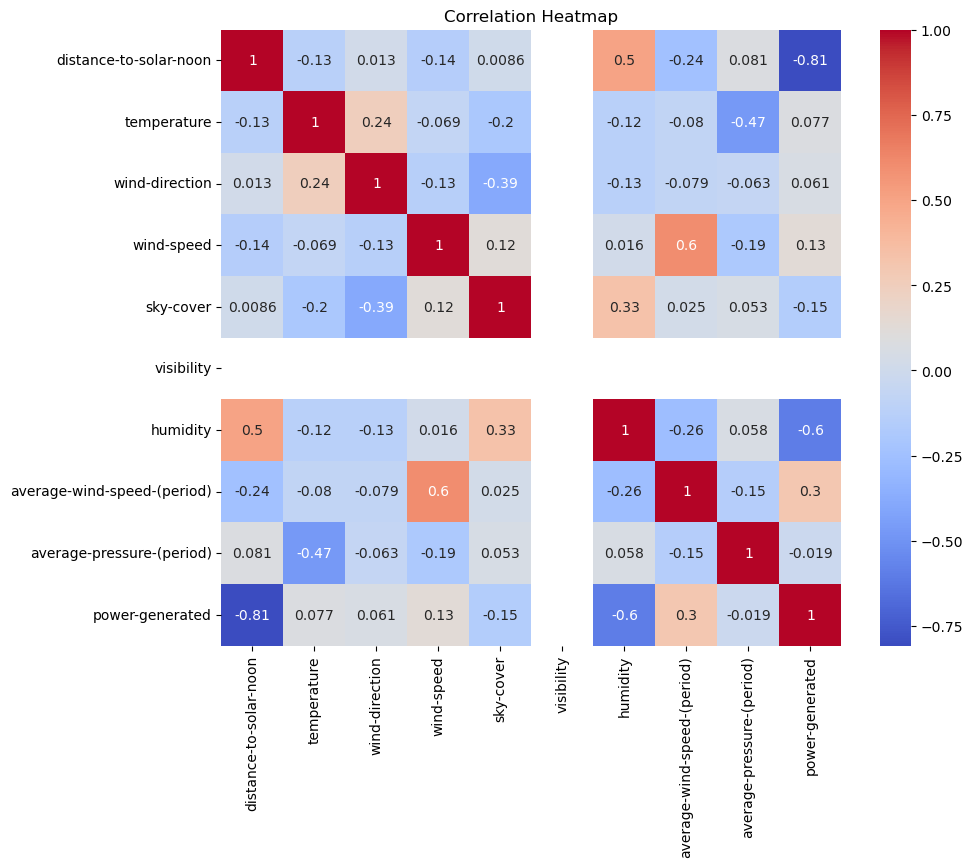

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [11]:
df_clean.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

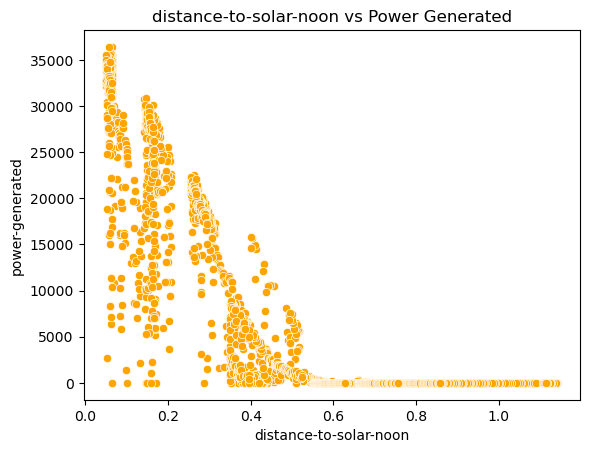

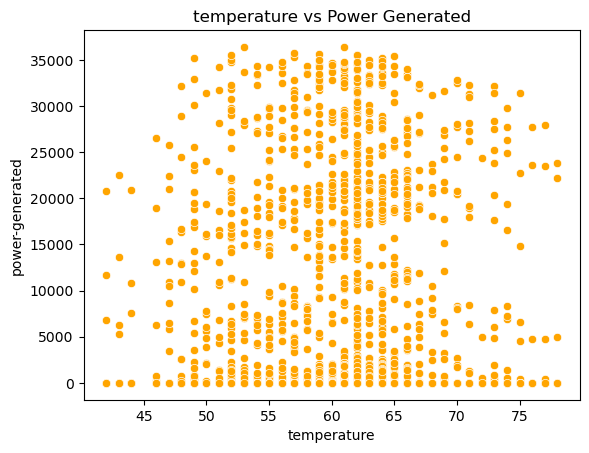

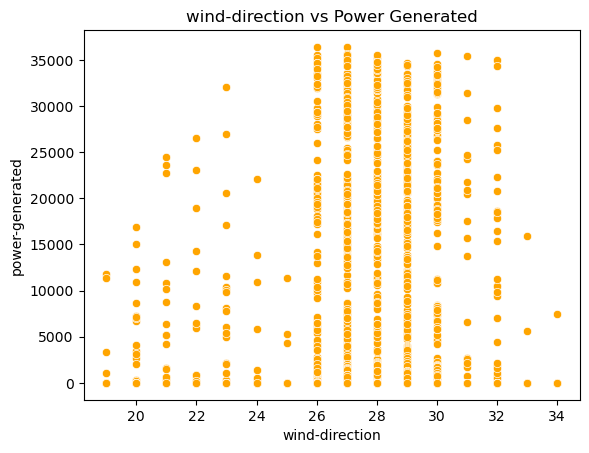

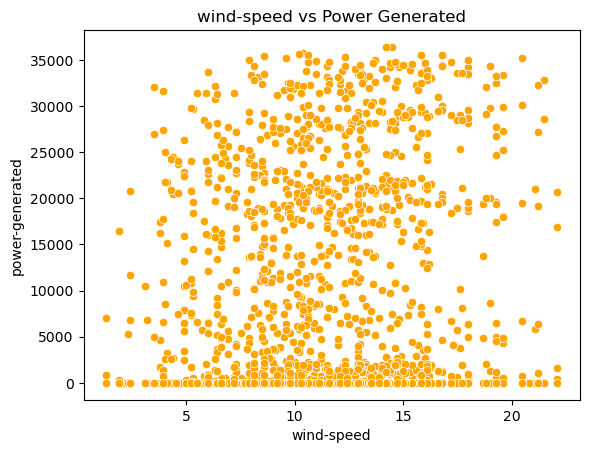

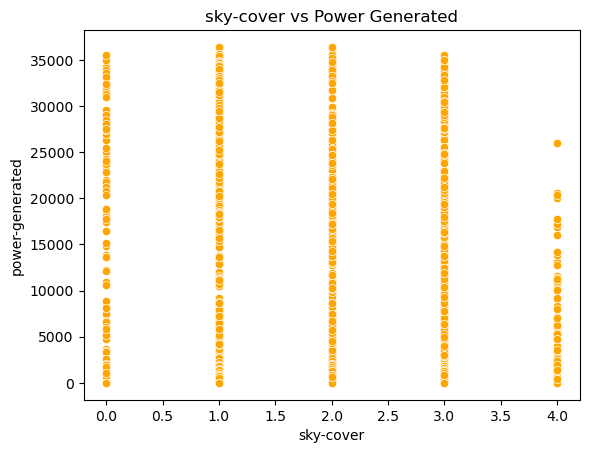

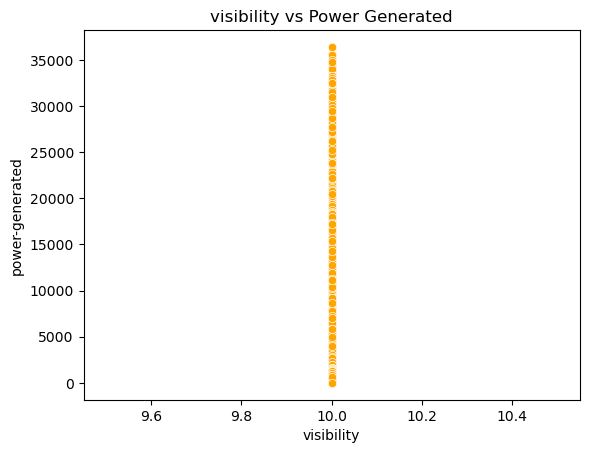

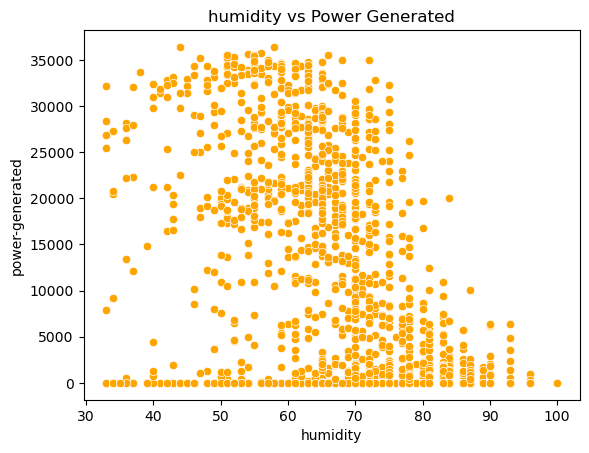

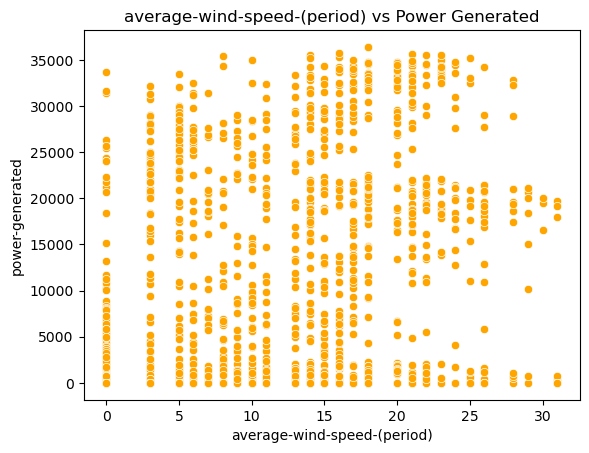

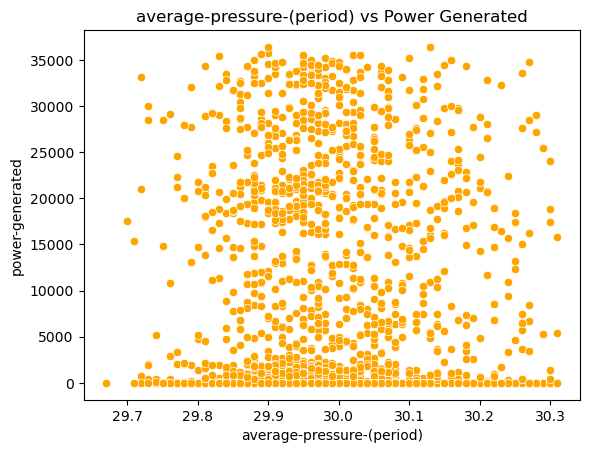

In [12]:
for col in numerical_cols:
    plt.figure()
    sns.scatterplot(x=df_clean[col], y=df_clean['power-generated'], color='orange')
    plt.title(f'{col} vs Power Generated')
    plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df_clean[numerical_cols])
df_scaled = pd.DataFrame(scaled, columns=numerical_cols)

# target column name
df_scaled['power-generated'] = df_clean['power-generated'].values

df_scaled.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,1.277225,1.388462,0.124705,-0.880858,-1.426521,0.0,0.169389,-0.456001,-1.454418,0
1,0.467444,1.388462,0.124705,-0.880858,-1.426521,0.0,0.318410,-0.885932,-1.202496,0
2,-0.342337,1.388462,0.124705,-0.880858,-1.426521,0.0,-0.203163,-1.602484,-0.866599,5418
3,-1.152118,1.388462,0.124705,-0.880858,-1.426521,0.0,-2.960048,-1.602484,-0.698651,25477
4,0.116539,1.388462,0.124705,-0.880858,-1.426521,0.0,-2.736517,0.547172,-1.370444,515


## Model Building

### Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df_scaled.drop('power-generated', axis=1)
y = df_scaled['power-generated']

# 80% Training - for model to learn , 20% Testing - to check how well model performs on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((1600, 9), (401, 9))

### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()      #creating model
model.fit(X_train, y_train)     #Model Fitting - Training
y_pred_lr = model.predict(X_test)

# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("R2 Score:", r2_lr)

Linear Regression Results:
MAE: 5016.802284141746
MSE: 36541892.43460783
R2 Score: 0.7016341268975768


- Linear Regression finds the best fit line between input features and target variables.
- It tries to minimize the difference between actual and predicted values.

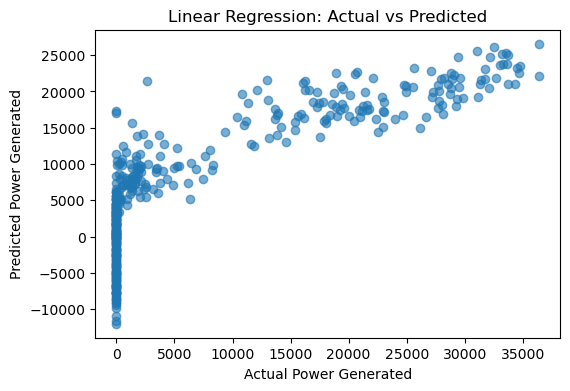

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.xlabel("Actual Power Generated")
plt.ylabel("Predicted Power Generated")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

- The scatter plot helps visualize how close predictions are to actual values.
- If dots are close to the diagonal line - Model prediction is good.

- MAE(Mean Absolute Error): Average of absolute difference between actual and predicted values. Lower=Better.
- MSE(Mean Squared Error): Penalizes large errors more strongly. Lower=Better.
- R square Score: Tells how much variance in target variable is explained by the model. Close to 1=Better Performance.

### Lasso-Ridge Regression

In [17]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Results:")
print("MAE:", mae_lasso)
print("MSE:", mse_lasso)
print("R2 Score:", r2_lasso)

# Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Results:")
print("MAE:", mae_ridge)
print("MSE:", mse_ridge)
print("R2 Score:", r2_ridge)

Lasso Regression Results:
MAE: 5016.794279964136
MSE: 36541721.02769085
R2 Score: 0.7016355264412522
Ridge Regression Results:
MAE: 5016.258830828187
MSE: 36539000.73781011
R2 Score: 0.7016577377064954


### Decision Tree Regressor

In [18]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)       #model creation
dt.fit(X_train, y_train)               #Model fitting - training
y_pred_dt = dt.predict(X_test)        #prediction

#Evaluation
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print("MAE:", mae_dt)
print("MSE:", mse_dt)
print("R2 Score:", r2_dt)

Decision Tree Results:
MAE: 1675.2568578553617
MSE: 15996981.047381546
R2 Score: 0.8693840712889687


- Decision Tree Splits the data into branches based on conditions.
- It captures non-linear relationships better than linear regression.

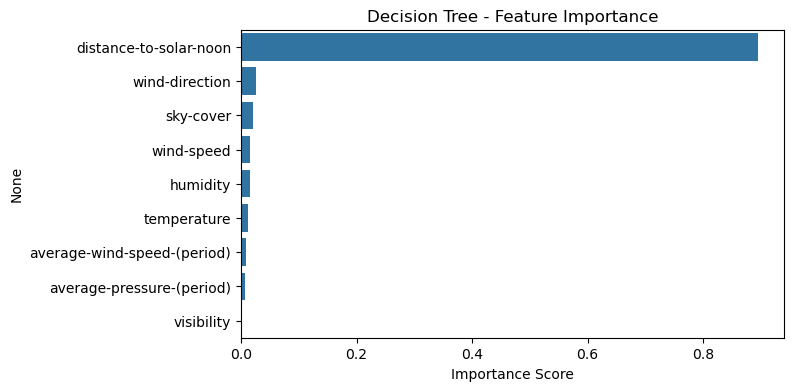

In [19]:
importance = pd.Series(dt.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=importance.values, y=importance.index)
plt.title("Decision Tree - Feature Importance")
plt.xlabel("Importance Score")
plt.show()

- This bar chart shows which feature affect power generation most.
- Higher bar - more impact on prediction.

### Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)       #model creation
rf.fit(X_train, y_train)               #model fitting - Training
y_pred_rf = rf.predict(X_test)         #Prediction

#Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("R2 Score:", r2_rf)

Random Forest Results:
MAE: 1374.5390274314211
MSE: 10057313.789949875
R2 Score: 0.9178816692273578


- Random Forest combines multiple Decision Trees (called an ensemble) to improve accuracy and reduce overfitting.
- Usually performs best for regression problems like this.

In [21]:
from sklearn.model_selection import cross_val_score

# Random Forest Model (already trained)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross Validation (5 folds)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

print("Cross Validation R2 Scores:", cv_scores)
print("Average CV R2 Score:", np.mean(cv_scores))

Cross Validation R2 Scores: [0.85303795 0.76058299 0.90654535 0.91574732 0.94149255]
Average CV R2 Score: 0.87548123296298


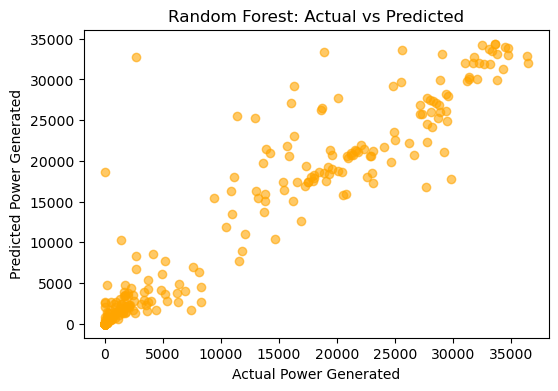

In [22]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='orange')
plt.xlabel("Actual Power Generated")
plt.ylabel("Predicted Power Generated")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

### Hyperparameter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

# Best model after tuning
best_rf = grid_search.best_estimator_

y_pred_best_rf = best_rf.predict(X_test)
print("Test R2 Score:", r2_score(y_test, y_pred_best_rf))

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best R2 Score: 0.918171135154822
Test R2 Score: 0.9156970211190456


### XGBoost

In [24]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("R2 Score:", r2_xgb)

XGBoost Results:
MAE: 1419.696044921875
MSE: 10391233.0
R2 Score: 0.9151551723480225


### Model Comparison

In [25]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso', 'Ridge', 'Decision Tree', 'Random Forest', 'Tuned RF', 'XGBoost'],
    'R2 Score': [r2_lr, r2_lasso, r2_ridge, r2_dt, r2_rf, r2_score(y_test, y_pred_best_rf), r2_xgb],
    'MAE': [mae_lr, mae_lasso, mae_ridge, mae_dt, mae_rf, mean_absolute_error(y_test, y_pred_best_rf), mae_xgb],
    'MSE': [mse_lr, mse_lasso, mse_ridge, mse_dt, mse_rf, mean_squared_error(y_test, y_pred_best_rf), mse_xgb]
})
print(comparison)

               Model  R2 Score          MAE           MSE
0  Linear Regression  0.701634  5016.802284  3.654189e+07
1              Lasso  0.701636  5016.794280  3.654172e+07
2              Ridge  0.701658  5016.258831  3.653900e+07
3      Decision Tree  0.869384  1675.256858  1.599698e+07
4      Random Forest  0.917882  1374.539027  1.005731e+07
5           Tuned RF  0.915697  1404.284305  1.032488e+07
6            XGBoost  0.915155  1419.696045  1.039123e+07


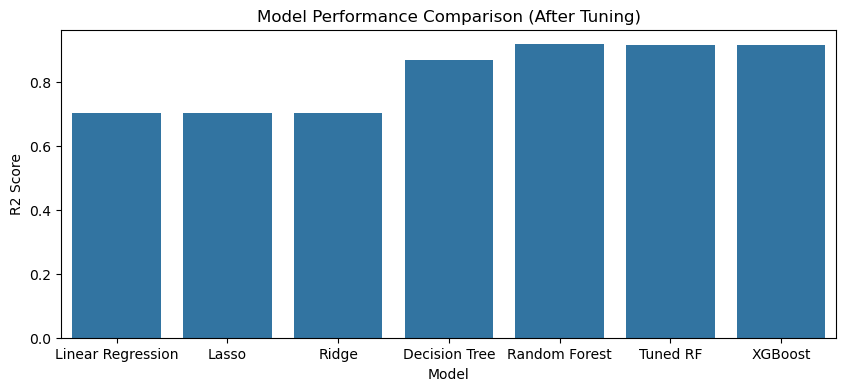

In [26]:
plt.figure(figsize=(10,4))
sns.barplot(x='Model', y='R2 Score', data=comparison)
plt.title("Model Performance Comparison (After Tuning)")
plt.show()

- Bar chart compares accuracy(R square score) of all models.
- The model with highest R square and lowest MAE/MSE is best.

## Modeling Summary

- Split data into Training (80%) and Testing (20%)

- Models Applied:
   1. Linear Regression – simple baseline model
  2. Lasso Regression – used for feature regularization (L1 penalty)
  3. Ridge Regression – used for feature regularization (L2 penalty)
  4. Decision Tree Regressor – captured non-linear relationships
  5. Random Forest Regressor – combined multiple trees for better accuracy
  6. Tuned Random Forest – hyperparameter tuning applied for optimization
  7. XGBoost Regressor – gradient boosting model for further performance boost

### Key Insights:
- Linear, Lasso, and Ridge Regression performed similarly, explaining around 70% of the variation.
- Decision Tree improved performance by capturing non-linear relationships.
- Random Forest gave the highest accuracy (R² = 0.9179) and lowest errors (MAE = 1374.5, MSE = 1.00×10⁷).
- Tuned Random Forest and XGBoost performed close to base Random Forest, showing stable model performance.
- Overall, Random Forest balances accuracy and simplicity effectively.

### Conclusion:

Final Selected Model: **Random Forest Regressor**
- It explains ~92% of the variation in solar power generation.
- Produces the lowest prediction errors among all models.
- Works well with both linear and non-linear data patterns.
- Hence, Random Forest Regressor is chosen for final deployment using Streamlit.

In [32]:
import joblib

# Saving the tuned Random Forest model
joblib.dump(best_rf, 'random_forest_model.pkl')

print("Model saved successfully as 'random_forest_model.pkl'")

Model saved successfully as 'random_forest_model.pkl'


In [33]:
X = df[['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 
       'average-wind-speed-(period)', 'average-pressure-(period)']]

y = df['power-generated']

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X, y)

joblib.dump(model, "rf_no_scaler.pkl")
print("Model saved successfully.")

Model saved successfully.


In [34]:
import joblib

joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [30]:
##################################################################################